# Scrape Exchange Rate

This notebook scrapes the daily USD-MNT exchange rate from the MongolBank website. 

In [1]:
from bs4 import BeautifulSoup
import requests
import datetime
import pandas as pd

## Scraping just one USD value

In [2]:
response = requests.get('https://www.mongolbank.mn/eng/dblistofficialdailyrate.aspx?vYear=2022&vMonth=10&vDay=2')

In [3]:
soup = BeautifulSoup(response.content)

In [9]:
usd = soup.find('span', {'id':'ContentPlaceHolder1_lblUSD'}).text

In [12]:
usd = float(usd.replace(",",""))

## Scraping a bunch of them

In [36]:
start = datetime.datetime(2022,9,15)
end = datetime.datetime(2022,10,2)
delta = end - start

In [37]:
delta.days

17

In [38]:
days = []
urls = []

In [39]:
for i in range(delta.days + 1):
    days.append(start + datetime.timedelta(days=i))

In [40]:
days[:5]

[datetime.datetime(2022, 9, 15, 0, 0),
 datetime.datetime(2022, 9, 16, 0, 0),
 datetime.datetime(2022, 9, 17, 0, 0),
 datetime.datetime(2022, 9, 18, 0, 0),
 datetime.datetime(2022, 9, 19, 0, 0)]

In [41]:
for day in days:
    urls.append(f'https://www.mongolbank.mn/eng/dblistofficialdailyrate.aspx?vYear={str(day.year)}&vMonth={str(day.month)}&vDay={str(day.day)}')

In [42]:
scraping = pd.DataFrame(days, columns=['days'])
scraping['urls'] = urls

In [43]:
scraping.head()

,days,urls
0,2022-09-15,https://www.mongolbank.mn/eng/dblistofficialda...
1,2022-09-16,https://www.mongolbank.mn/eng/dblistofficialda...
2,2022-09-17,https://www.mongolbank.mn/eng/dblistofficialda...
3,2022-09-18,https://www.mongolbank.mn/eng/dblistofficialda...
4,2022-09-19,https://www.mongolbank.mn/eng/dblistofficialda...


In [46]:
exchange_rate = []

for index, row in scraping.iterrows():
    try:
        #fetch the page from the URL
        page_response = requests.get(row['urls'], timeout=15)

        #Initialize BeautifulSoup and parse page data
        soup = BeautifulSoup(page_response.content)
        
        #find an store variables
        usd = soup.find(id="ContentPlaceHolder1_lblUSD").text
        date = row['days'].strftime('%m/%d/%Y')
        #append scraped data to list
        exchange_rate.append({'Date': date, 'USD': usd})
    except:
        exchange_rate.append({'Date': date, 'USD': 'error'})

In [52]:
df = pd.DataFrame(exchange_rate)

In [55]:
df['USD'] = df['USD'].str.replace(",","").astype('float')

In [59]:
df['Date'] = pd.to_datetime(df['Date'])

<AxesSubplot: xlabel='Date'>

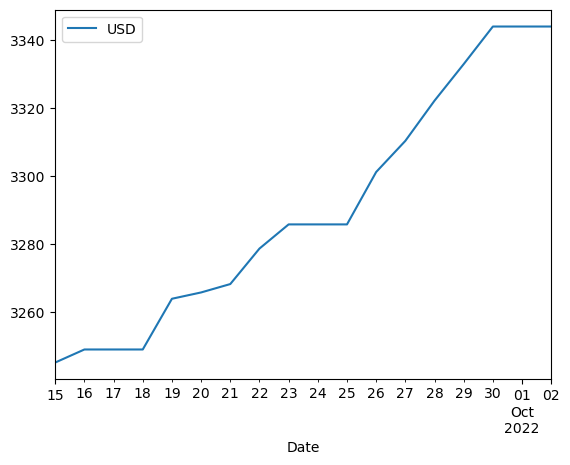

In [65]:
df.plot(x='Date', y='USD')

In [67]:
## Use this for exporting to local project folder when using a local runtime.
df.to_csv('usd-mnt.csv', index=False)